In [1]:
import pandas as pd
import numpy as np

# Creating the DataFrame from the provided data
data = {
    "Row": ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m"],
    "Type": [
        "Linear probing", "Linear probing", "Linear probing", "Linear probing",
        "Supervised", "Supervised", "Supervised Baseline", "Supervised",
        "Supervised", "Supervised", "Supervised", "Supervised", "Control"
    ],
    "Method": [
        "Logistic Regression (CLOOME)", "Logistic Regression (CellProfiler)",
        "Logistic Regression (Cell Count)", "Logistic Regression (CellCount+MW+logP)",
        "ResNet", "FNN", "Cell Count", "DenseNet", "GapNet", "MIL-Net",
        "M-CNN", "SC-CNN", "y-scrambling"
    ],
    "AUC": [
        "0.71 ± 0.19", "0.66 ± 0.20", "0.70 ± 0.22", "0.74 ± 0.21",
        "0.73 ± 0.19", "0.68 ± 0.20", "0.68 ± 0.21", "0.73 ± 0.19",
        "0.73 ± 0.19", "0.71 ± 0.18", "0.71 ± 0.19", "0.71 ± 0.20", "0.50 ± 0.01"
    ],
    "AUC > 0.9": [57, 35, 64, 64, 66, 54, 57, 65, 60, 59, 58, 63, 0],
    "AUC > 0.8": [83, 63, 74, 103, 85, 69, 73, 93, 88, 71, 72, 71, 0],
    "AUC > 0.7": [102, 84, 103, 128, 114, 78, 82, 113, 115, 100, 100, 104, 0],
    "AUC > 0.5": [179, 170, 189, 186, 178, 170, 168, 178, 179, 187, 172, 172, 101],
}

df = pd.DataFrame(data)
df

,Row,Type,Method,AUC,AUC > 0.9,AUC > 0.8,AUC > 0.7,AUC > 0.5
0,a,Linear probing,Logistic Regression (CLOOME),0.71 ± 0.19,57,83,102,179
1,b,Linear probing,Logistic Regression (CellProfiler),0.66 ± 0.20,35,63,84,170
2,c,Linear probing,Logistic Regression (Cell Count),0.70 ± 0.22,64,74,103,189
3,d,Linear probing,Logistic Regression (CellCount+MW+logP),0.74 ± 0.21,64,103,128,186
4,e,Supervised,ResNet,0.73 ± 0.19,66,85,114,178
5,f,Supervised,FNN,0.68 ± 0.20,54,69,78,170
6,g,Supervised Baseline,Cell Count,0.68 ± 0.21,57,73,82,168
7,h,Supervised,DenseNet,0.73 ± 0.19,65,93,113,178
8,i,Supervised,GapNet,0.73 ± 0.19,60,88,115,179
9,j,Supervised,MIL-Net,0.71 ± 0.18,59,71,100,187


In [2]:
import matplotlib.pyplot as plt
# Prepare data for the combined plot
import numpy as np

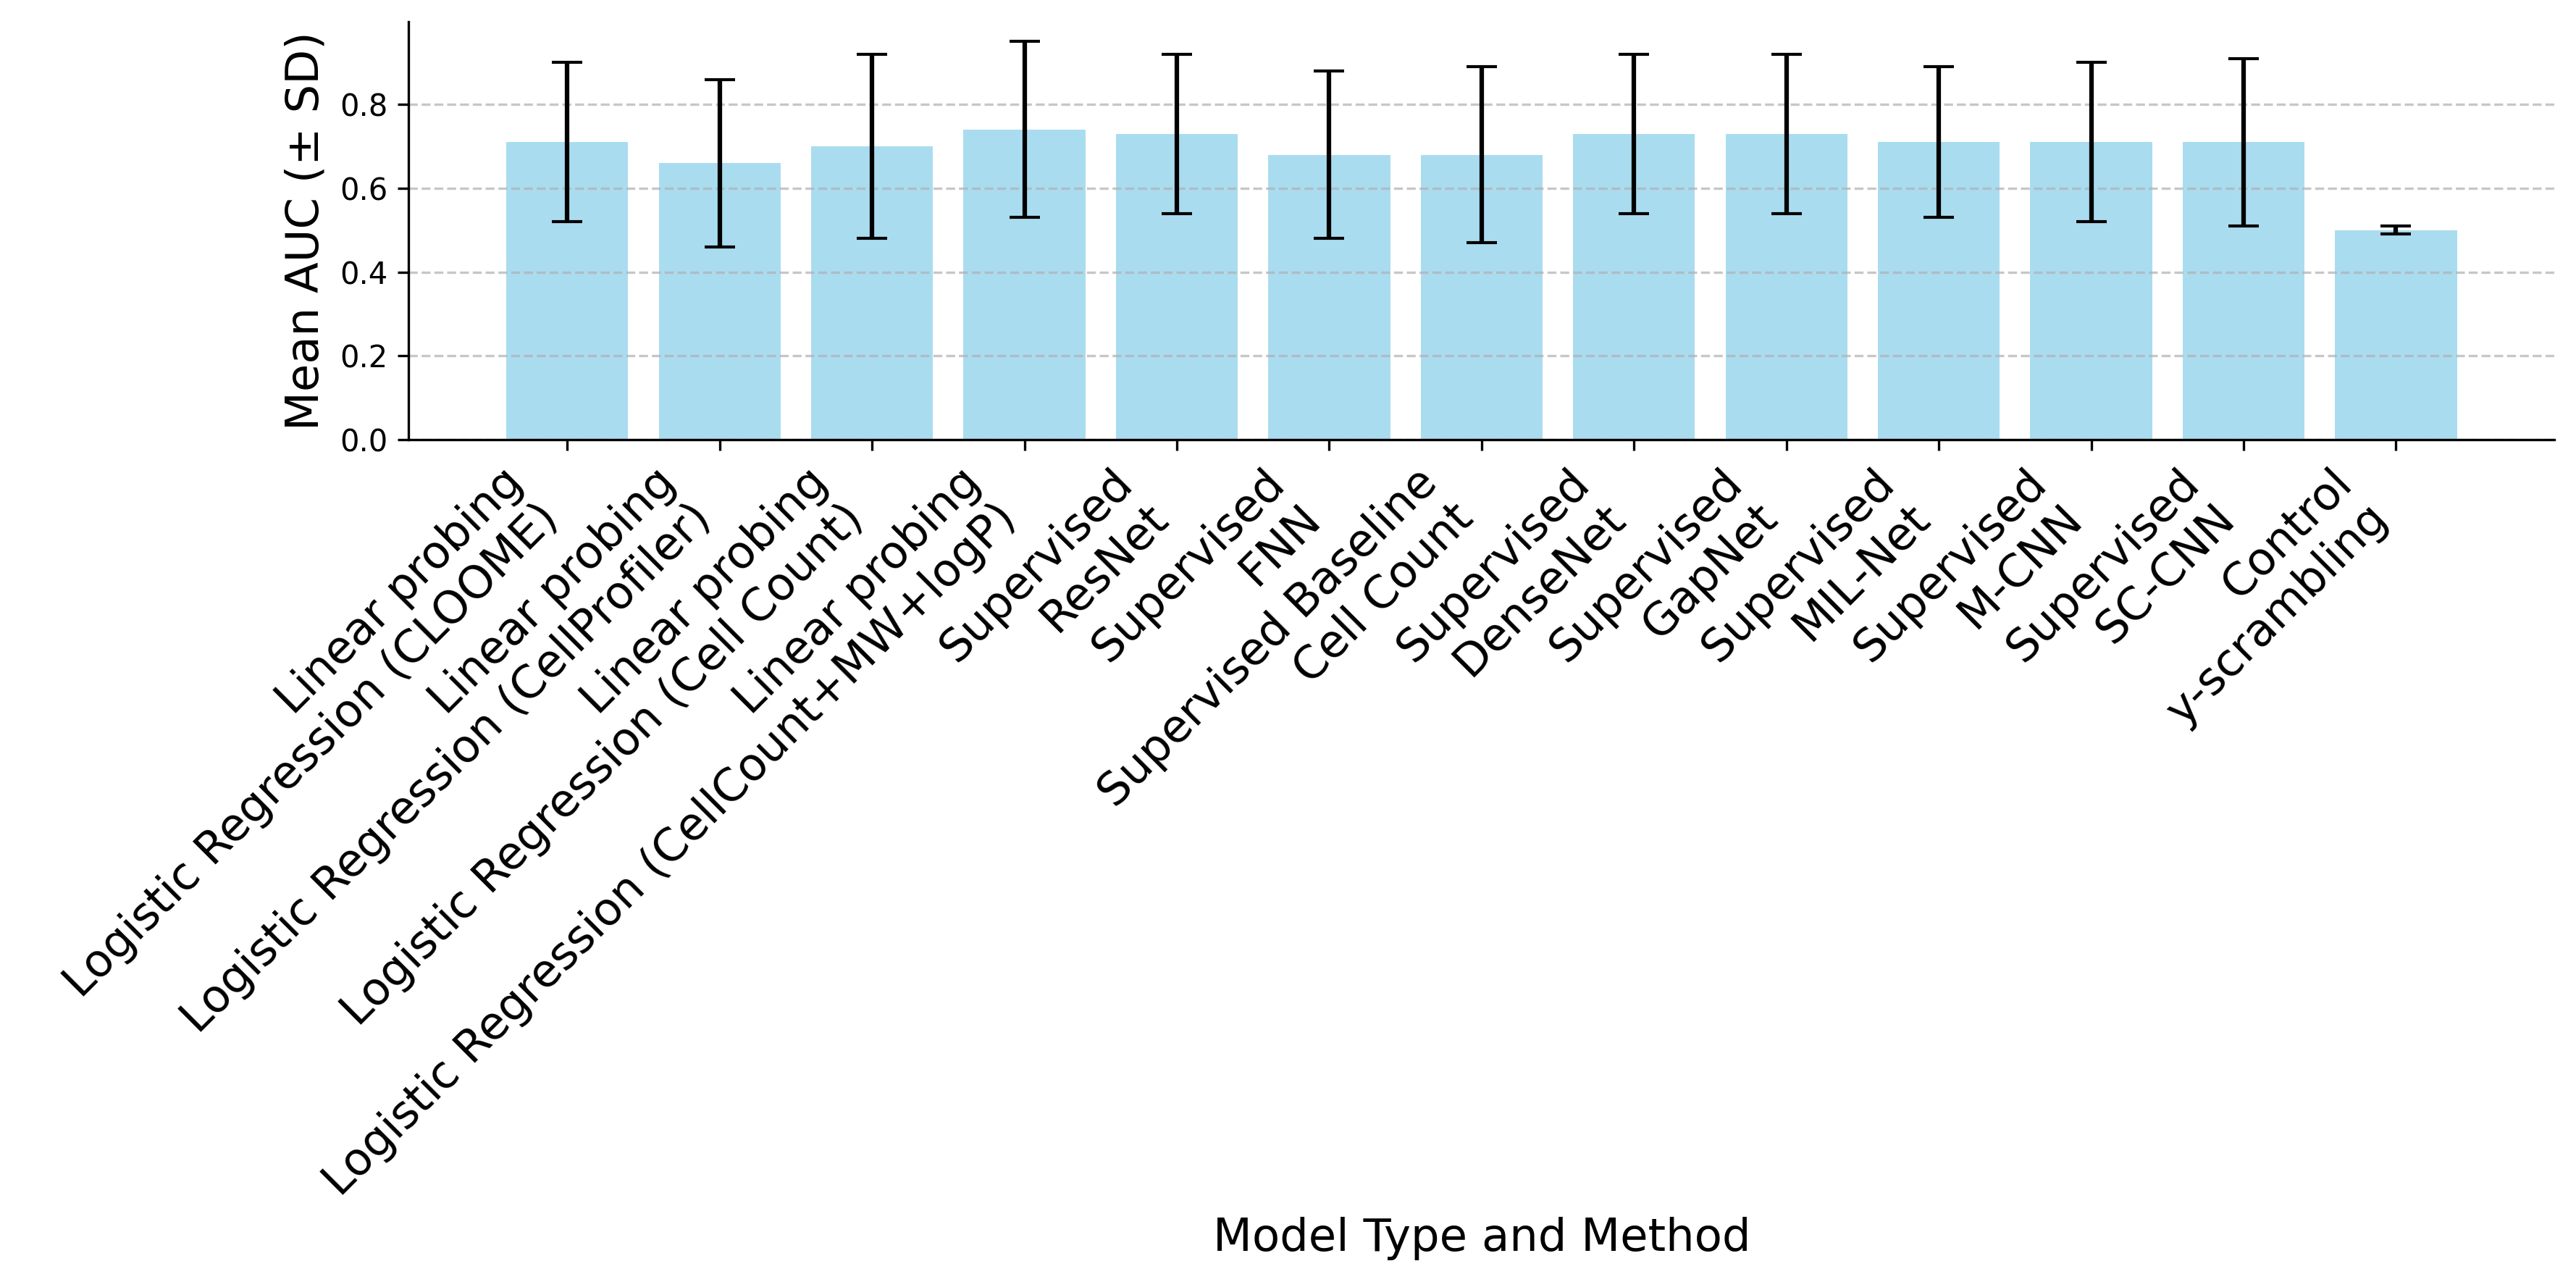

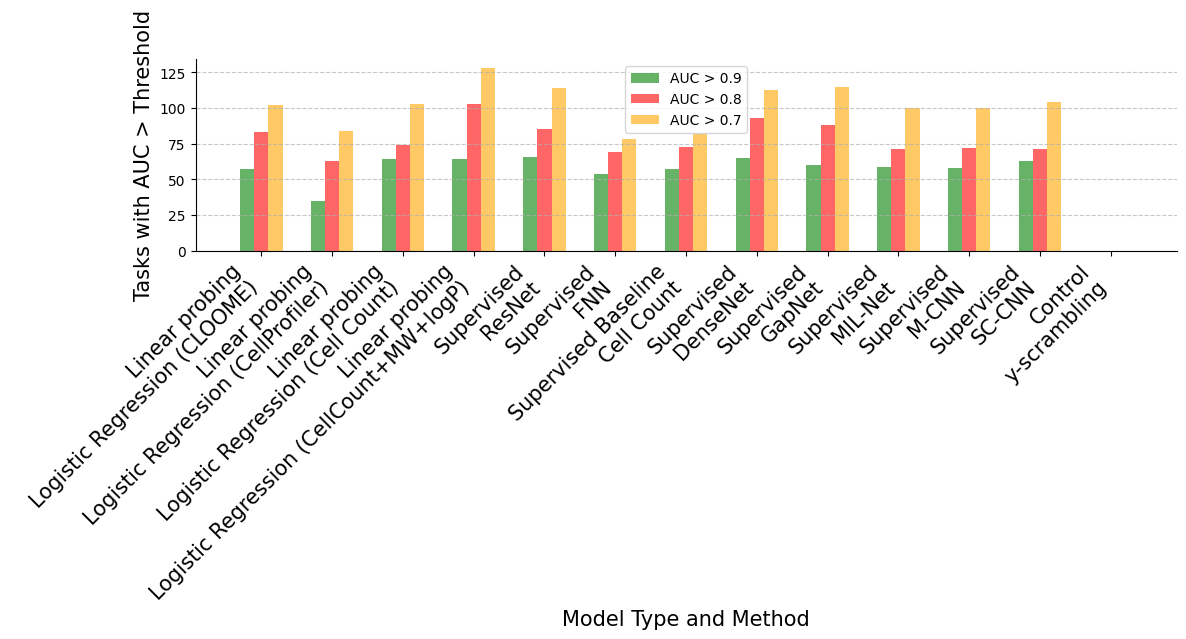

In [10]:
# Prepare data for the combined plot
import numpy as np

# Ensure numerical columns for thresholds
df['AUC > 0.9'] = pd.to_numeric(df['AUC > 0.9'], errors='coerce')
df['AUC > 0.8'] = pd.to_numeric(df['AUC > 0.8'], errors='coerce')
df['AUC > 0.7'] = pd.to_numeric(df['AUC > 0.7'], errors='coerce')
df['AUC > 0.5'] = pd.to_numeric(df['AUC > 0.5'], errors='coerce')

# Dummy values for mean AUC and standard deviation (to simulate realistic plotting)
df['Mean AUC'] = [float(x.split('±')[0]) for x in df['AUC']]
df['AUC Std Dev'] = [float(x.split('±')[1]) for x in df['AUC']]

# Create model indices and labels
new_model_indices = np.arange(len(df['Type']))
new_x_labels = [f"{t}\n{m}" for t, m in zip(df['Type'], df['Method'])]


# First plot: Mean AUC with error bars (adjusted with no top/right axis and arrows on left axis)
plt.figure(figsize=(12, 6), dpi=300)
plt.bar(new_model_indices, df['Mean AUC'], yerr=df['AUC Std Dev'], color='skyblue', capsize=5, alpha=0.7)
plt.xlabel('Model Type and Method', fontsize=15)
plt.ylabel('Mean AUC (± SD)', fontsize=15, color='black')
plt.xticks(new_model_indices, new_x_labels, fontsize=15 , rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# Second plot: AUC thresholds (adjusted with no top/right axis and arrows on left axis)
plt.figure(figsize=(12, 6))
width = 0.2
plt.bar(new_model_indices - width, df['AUC > 0.9'], width, label='AUC > 0.9', color='green', alpha=0.6)
plt.bar(new_model_indices, df['AUC > 0.8'], width, label='AUC > 0.8', color='red', alpha=0.6)
plt.bar(new_model_indices + width, df['AUC > 0.7'], width, label='AUC > 0.7', color='orange', alpha=0.6)
plt.xlabel('Model Type and Method', fontsize=15)
plt.ylabel('Tasks with AUC > Threshold', fontsize=15, color='black')
plt.xticks(new_model_indices, new_x_labels, fontsize=15 , rotation=45, ha="right")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()
